**IRIS FLOWER CLASSIFICATION**

Name: Kanchan Santosh Kad.

Domain: Data Science.

Aim: train a machine learning model that can learn from measurements and
accurately classify the Iris flowers into their respective species.


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [91]:
df.shape

(150, 5)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [93]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [94]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [95]:
df.duplicated().sum()

3

In [96]:
df1=df.drop_duplicates()

In [97]:
df1.shape

(147, 5)

In [98]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Exploratory Data Analysis** 

In [99]:
df1.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [102]:
df1.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [103]:
df1['species'].value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

C:\Users\kanchan\AppData\Local\Temp\ipykernel_20204\113044943.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "species", data=df1, palette="Dark2")


<Axes: xlabel='species', ylabel='count'>

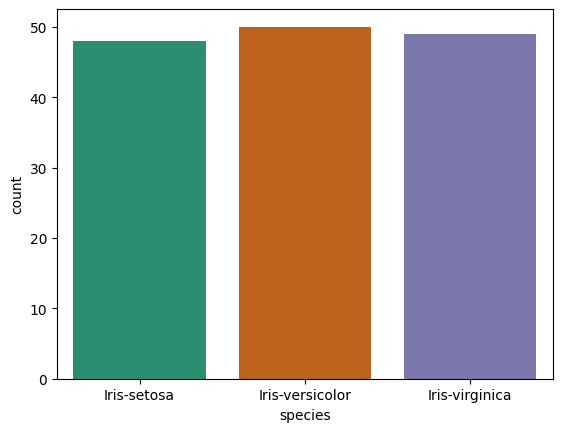

In [104]:
# Plotting the species data
sns.countplot(x = "species", data=df1, palette="Dark2")

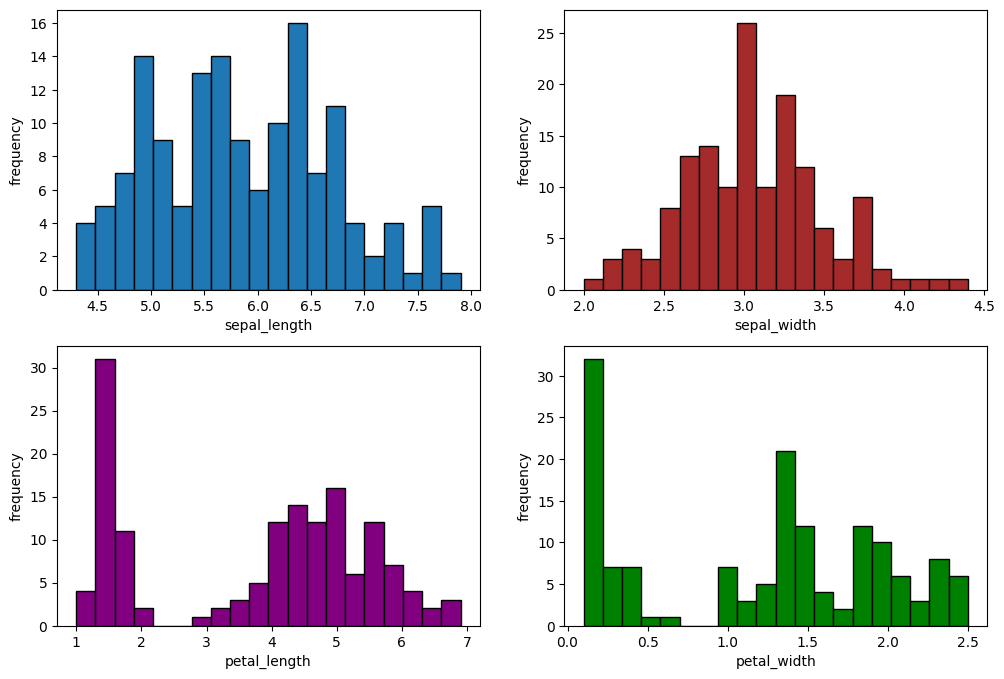

In [105]:
fig,ax=plt.subplots(2,2, figsize=(12,8))

ax[0,0].hist(df1['sepal_length'],bins=20,edgecolor='black')
ax[0,0].set_xlabel('sepal_length')
ax[0,0].set_ylabel('frequency')

ax[0,1].hist(df1['sepal_width'],bins=20,edgecolor='black',color='brown')
ax[0,1].set_xlabel('sepal_width')
ax[0,1].set_ylabel('frequency')

ax[1,0].hist(df1['petal_length'],bins=20,edgecolor='black',color='purple')
ax[1,0].set_xlabel('petal_length')
ax[1,0].set_ylabel('frequency')

ax[1,1].hist(df1['petal_width'],bins=20,edgecolor='black',color='green')
ax[1,1].set_xlabel('petal_width')
ax[1,1].set_ylabel('frequency')
plt.show()

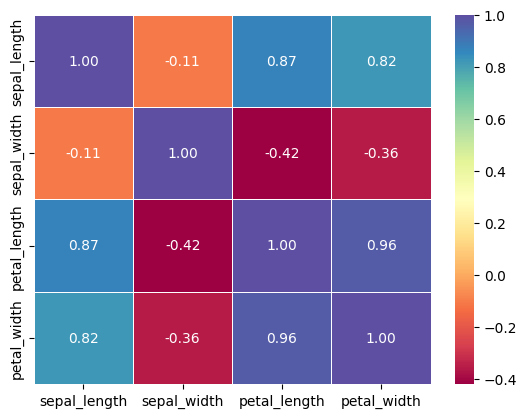

In [106]:
# Checking relationship between variables
fig,ax=plt.subplots()
sns.heatmap(df1.drop(columns='species').corr(), annot=True,cmap='Spectral',fmt=".2f",ax=ax,linewidth=0.5)
plt.show()

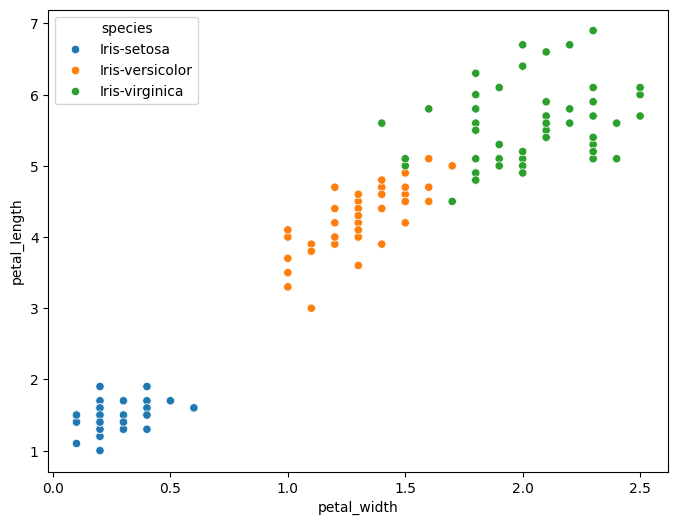

In [107]:
# Scatterplot for petal length and petal width by species
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x="petal_width",y="petal_length",hue="species",data=df1)
plt.show()

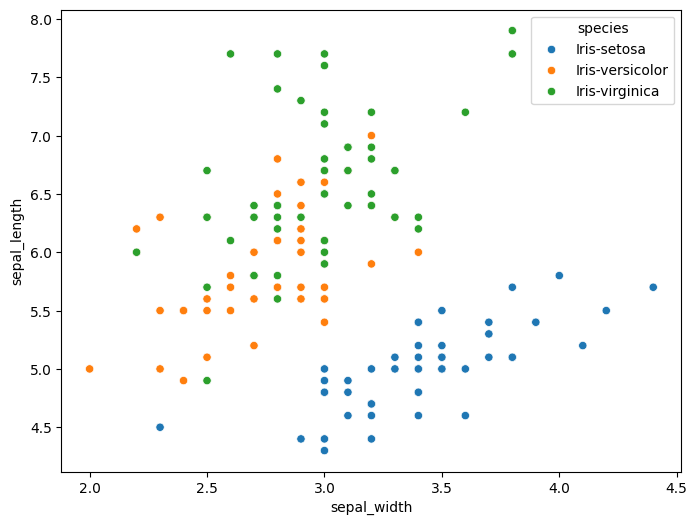

In [108]:
# Scatterplot for sepal length and sepal width by species
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x="sepal_width",y="sepal_length",hue="species",data=df1)
plt.show()

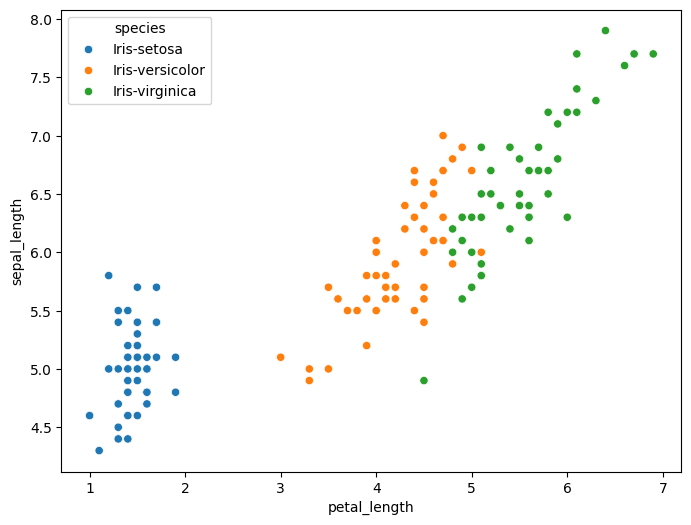

In [109]:
# Scatterplot for sepal length and petal length by species
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x="petal_length",y="sepal_length",hue="species",data=df1)
plt.show()

In [110]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [111]:
df1['species']=label_encoder.fit_transform(df1['species'])

C:\Users\kanchan\AppData\Local\Temp\ipykernel_20204\192021457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['species']=label_encoder.fit_transform(df1['species'])


In [112]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**Data Splitting**

In [113]:
from sklearn.model_selection import train_test_split

# Define feature and target variables
x= df1.drop('species',axis=1)
y=df1['species']

#Split dataset into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

train_data= x_train.join(y_train)
train_data

,sepal_length,sepal_width,petal_length,petal_width,species
83,6.0,2.7,5.1,1.6,1
137,6.4,3.1,5.5,1.8,2
65,6.7,3.1,4.4,1.4,1
63,6.1,2.9,4.7,1.4,1
73,6.1,2.8,4.7,1.2,1
...,...,...,...,...,...
77,6.7,3.0,5.0,1.7,1
97,6.2,2.9,4.3,1.3,1
138,6.0,3.0,4.8,1.8,2
92,5.8,2.6,4.0,1.2,1


**Model Selection**

**1.K- Nearest Neighbors (KNN) Model**

In [114]:
from sklearn.neighbors import KNeighborsClassifier

#Build a KNN model
fitted_model_knn = KNeighborsClassifier()
#Train the model
fitted_model_knn.fit(x_train,y_train)
#Make predictions
y_pred_knn = fitted_model_knn.predict(x_test)

 Accuracy for KNN: 0.9667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94         8
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



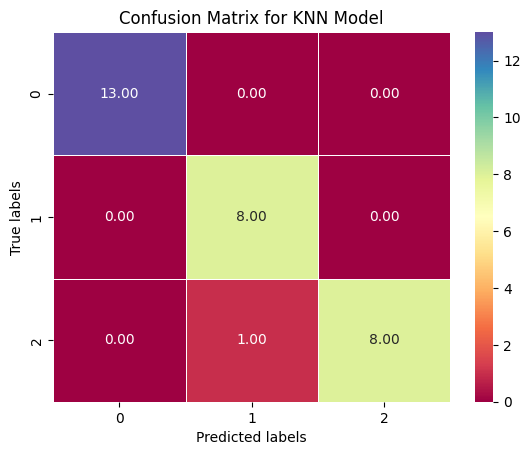

In [115]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy1 = accuracy_score(y_test, y_pred_knn)
print(f' Accuracy for KNN: {accuracy1:.4f}')
print(classification_report(y_test, y_pred_knn))
cf1=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cf1,annot=True,fmt=".2f",cmap="Spectral",linewidth=0.5)
plt.title('Confusion Matrix for KNN Model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

**2. Random Forest Classifier Model**

In [116]:
from sklearn.ensemble import RandomForestClassifier

#Build a KNN model
fitted_model_rf = RandomForestClassifier()
#Train the model
fitted_model_rf.fit(x_train,y_train)
#Make predictions
y_pred_rf = fitted_model_rf.predict(x_test)

 Accuracy for RF: 0.9667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94         8
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



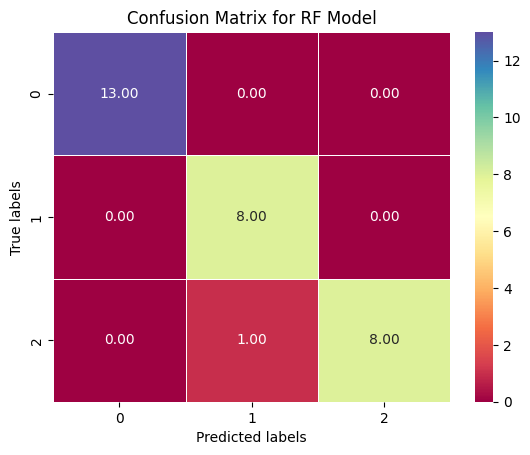

In [117]:
accuracy2 = accuracy_score(y_test, y_pred_rf)
print(f' Accuracy for RF: {accuracy2:.4f}')
print(classification_report(y_test, y_pred_rf))
cf4=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cf4,annot=True,fmt=".2f",cmap="Spectral",linewidth=0.5)
plt.title('Confusion Matrix for RF Model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

**3.  Logistic Regression Model**

In [118]:
from sklearn.linear_model import LogisticRegression

#Build a Logisitc Regression model
fitted_model_lr = LogisticRegression()
#Train the model
fitted_model_lr.fit(x_train,y_train)
#Make predictions
y_pred_lr = fitted_model_lr.predict(x_test)

 Accuracy for LR: 0.9333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.80      1.00      0.89         8
           2       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



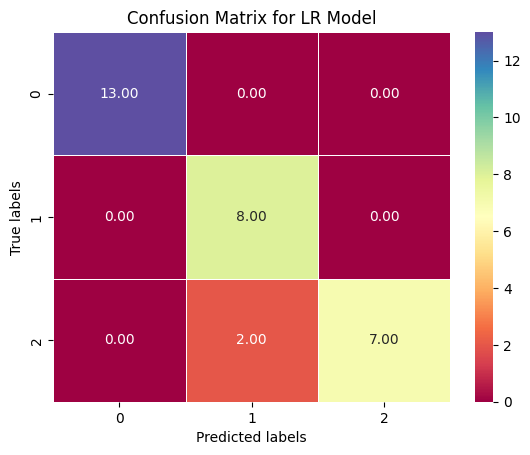

In [119]:
accuracy3 = accuracy_score(y_test, y_pred_lr)
print(f' Accuracy for LR: {accuracy3:.4f}')
print(classification_report(y_test, y_pred_lr))
cf=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cf,annot=True,fmt=".2f",cmap="Spectral",linewidth=0.5)
plt.title('Confusion Matrix for LR Model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

**Model Comparison**

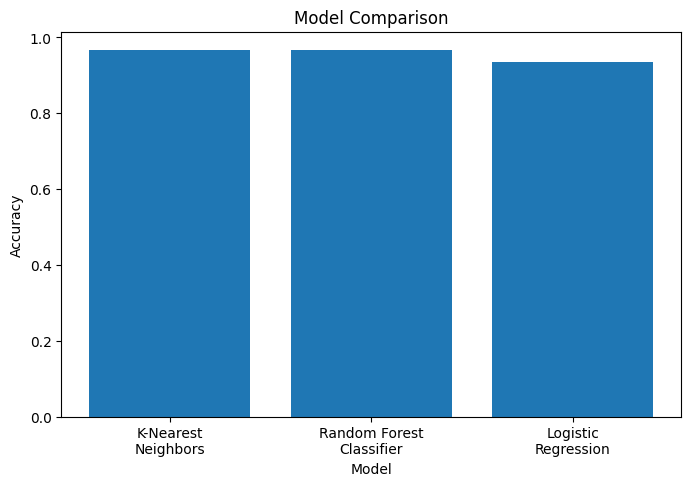

In [120]:
model_names = list([ "K-Nearest\nNeighbors", "Random Forest\nClassifier", "Logistic\nRegression"])
model_scores = list([accuracy1,accuracy2,accuracy3])

fig,ax=plt.subplots(figsize=(8, 5))
ax.bar(model_names,model_scores)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison')
plt.show()